In [45]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] =df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Filter for Data Analyst data
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

In [46]:
# Create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] =df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot

job_skills,sql,excel,python,tableau,power bi,r,sas,powerpoint,word,sap,...,angular.js,xamarin,gtx,nuxt.js,ovh,esquisse,suse,capacitor,chainer,msaccess
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,11336,8170,6606,5596,4285,3607,3830,1880,1778,1251,...,2,0,0,1,0,0,0,1,0,0
2,7947,5772,4751,3936,3307,2576,2634,1291,1235,954,...,0,0,0,0,0,0,0,0,0,0
3,7868,5675,4741,4051,3176,2650,2554,1266,1203,892,...,0,1,0,0,0,0,1,0,0,0
4,7553,5496,4557,3776,3106,2399,2598,1190,1177,947,...,0,0,0,0,1,0,0,0,0,0
5,6617,4773,4070,3245,2695,2093,1940,979,957,851,...,0,0,0,0,0,0,0,0,0,1
6,7584,5724,4707,3812,3275,2442,2174,1173,1237,987,...,0,0,0,0,0,0,0,0,0,0
7,7687,5513,4831,3928,3350,2444,2118,1096,1069,996,...,0,0,1,0,0,0,0,0,0,0
8,8823,6482,5576,4533,3859,2975,2560,1332,1298,1117,...,0,0,0,0,0,0,0,0,0,0
9,6829,4886,4229,3446,3118,2146,1880,944,945,852,...,0,0,0,0,0,0,0,0,0,0


In [47]:
# Use month name for plotting
df_DA_pivot =df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

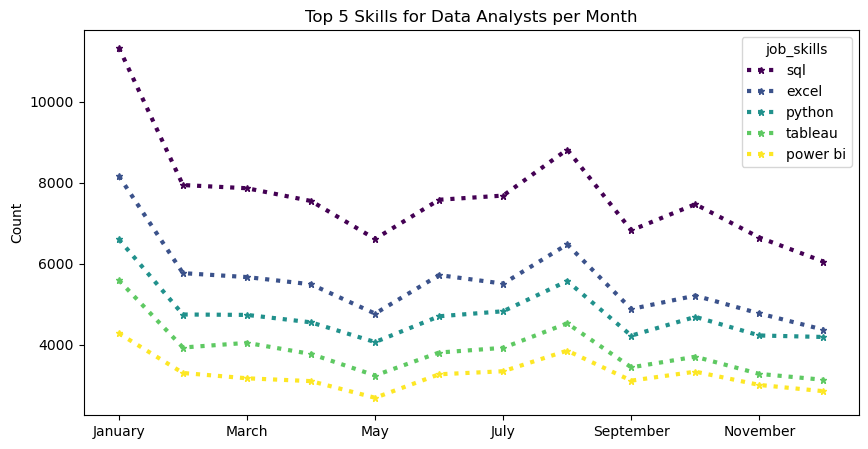

In [48]:

df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    linewidth=3,
    linestyle=':', # options: "-", "--", "-.", ":"
    colormap='viridis',
    marker='*', #options: 'o', 'x', '+', '*', 's', 'd','1', '2', '3', '4', 'h', 'H', 'p', '|', '_'
    markersize=5,
    figsize=(10,5)
)


plt.title("Top 5 Skills for Data Analysts per Month")
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [49]:
df = df[df['job_title_short'] == 'Data Analyst']
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count =('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

# Limit to top skills
skill_count = 20 
skill_stats.sort_values(by='skill_count', ascending=False, inplace=True)
skills_status = skill_stats.head(skill_count)
skills_status

,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


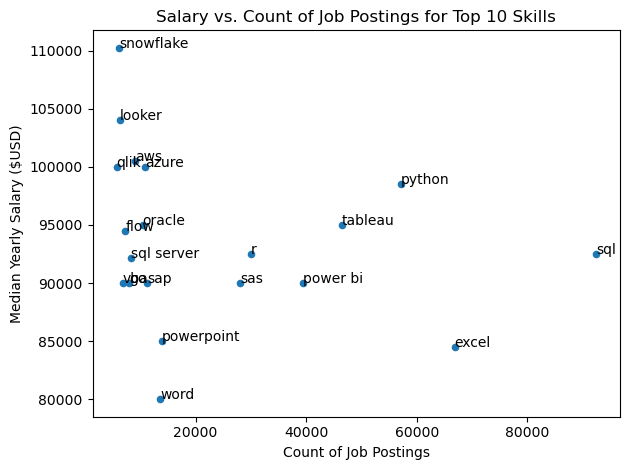

In [50]:
skills_status.plot(kind='scatter',x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel("Median Yearly Salary ($USD)")
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_status.index):
    plt.text(skills_status['skill_count'].iloc[i], skills_status['median_salary'].iloc[i], txt)

plt.show()

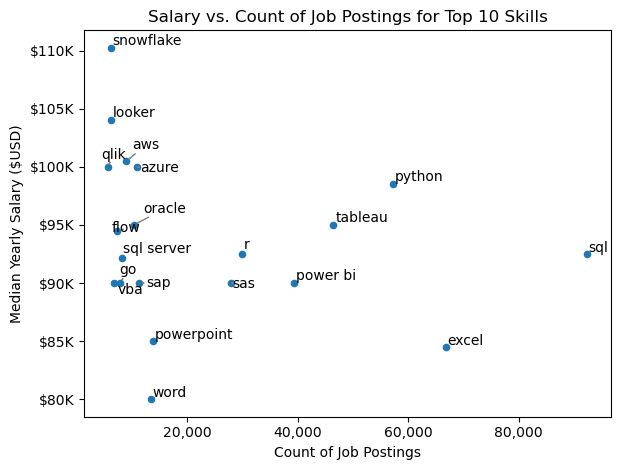

In [67]:
from adjustText import adjust_text

# fig, ax = plt.subplots()


skills_status.plot(kind='scatter',x='skill_count', y='median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel("Median Yearly Salary ($USD)")
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()


texts = []

for i, txt in enumerate(skills_status.index):
   texts.append( plt.text(skills_status['skill_count'].iloc[i], skills_status['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='grey', lw=1))

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K' ))   

plt.show()